In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
file='/scratch/kpegion/nino34_1982-2019.oisstv2.nc'
ds=xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:    (lat: 10, lon: 50, nbnds: 2, time: 456)
Coordinates:
  * lat        (lat) float32 -4.5 -3.5 -2.5 -1.5 -0.5 0.5 1.5 2.5 3.5 4.5
  * lon        (lon) float32 190.5 191.5 192.5 193.5 ... 236.5 237.5 238.5 239.5
  * time       (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

In [3]:
ds_nino34_index=ds.mean(dim=['lat','lon'])
ds_nino34_index

<xarray.Dataset>
Dimensions:  (time: 456)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
Data variables:
    sst      (time) float32 26.7181 26.695578 27.19256 ... 27.25634 27.063417

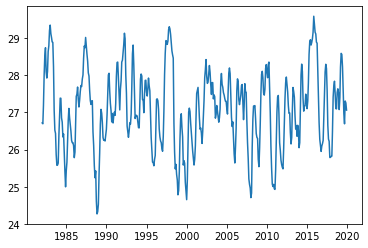

In [4]:
plt.plot(ds_nino34_index['time'],ds_nino34_index['sst'])

In [6]:
ds_climo=ds_nino34_index.groupby('time.month').mean()
ds_anoms=ds_nino34_index.groupby('time.month')-ds_climo
ds_anoms
ds_anoms.to_netcdf('/scratch/kpegion/nino34_1982-2019.oisstv2_anoms.nc')

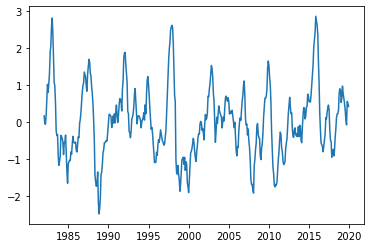

In [6]:
plt.plot(ds_anoms['time'],ds_anoms['sst'])

In [12]:
ds_3m=ds_anoms.rolling(time=3,center=True).mean().dropna(dim='time')
ds_3m

<xarray.Dataset>
Dimensions:  (time: 454)
Coordinates:
  * time     (time) datetime64[ns] 1982-02-01 1982-03-01 ... 2019-11-01
    month    (time) int64 2 3 4 5 6 7 8 9 10 11 12 1 ... 1 2 3 4 5 6 7 8 9 10 11
Data variables:
    sst      (time) float32 0.02446874 0.029970169 ... 0.3345973 0.49965224

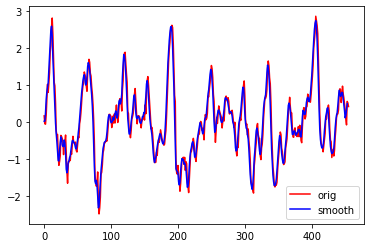

In [10]:
plt.plot(ds_anoms['sst'],color='r')
plt.plot(ds_3m['sst'],color='b')
plt.legend(['orig','smooth'])